In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MaxAbsScaler
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

In [82]:
import pandas as pd
df=pd.read_csv("train.csv")
df

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


In [83]:
df['Doors'].replace('02-Mar','2',inplace=True)
df['Doors'].replace('>5','5',inplace=True)
df['Doors'].replace('04-May','4',inplace=True)

In [84]:
df['Levy'].replace('-', np.nan, inplace = True)

In [85]:
df.isnull().sum()

ID                     0
Price                  0
Levy                5819
Manufacturer           0
Model                  0
Prod. year             0
Category               0
Leather interior       0
Fuel type              0
Engine volume          0
Mileage                0
Cylinders              0
Gear box type          0
Drive wheels           0
Doors                  0
Wheel                  0
Color                  0
Airbags                0
dtype: int64

In [86]:
df[['Levy']] = df[["Levy"]].astype("float64")

In [87]:
#filling Null values
#df['Levy']=df['Levy'].fillna(df['Levy'].mean())
df.fillna(df.groupby('Price').transform('mean'),inplace=True)
df['Levy']=df['Levy'].fillna(df['Levy'].mean())

In [88]:
df.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [89]:
df[['Doors']] = df[["Doors"]].astype("int")

In [90]:
df[['Mileage']] = df[["Mileage"]].astype("str")
df['Mileage'] = df['Mileage'].str.replace(' km', '')

In [91]:
df[['Mileage']] = df[["Mileage"]].astype("int64")

In [92]:
# new data frame with split value columns
new = df["Engine volume"].str.split(" ", n = 1, expand = True)
                                    
# making separate first name column from new data frame
df["Engine volume num"]= new[0]
                                    
# making separate last name column from new data frame
df["turbo"]= new[1] 
df

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Engine volume num,turbo
0,45654403,13328,1399.000000,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,4,Left wheel,Silver,12,3.5,None
1,44731507,16621,1018.000000,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000,6.0,Tiptronic,4x4,4,Left wheel,Black,8,3,None
2,45774419,8467,807.478261,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,4,Right-hand drive,Black,2,1.3,None
3,45769185,3607,862.000000,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,4,Left wheel,White,0,2.5,None
4,45809263,11726,446.000000,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,4,Left wheel,Silver,4,1.3,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,807.478261,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000,4.0,Manual,Rear,2,Left wheel,Silver,5,2.0,Turbo
19233,45778856,15681,831.000000,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600,4.0,Tiptronic,Front,4,Left wheel,Red,8,2.4,None
19234,45804997,26108,836.000000,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365,4.0,Automatic,Front,4,Left wheel,Grey,4,2,None
19235,45793526,5331,1288.000000,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258,4.0,Automatic,Front,4,Left wheel,Black,4,2,None


In [93]:
df[['Engine volume num']] = df[["Engine volume num"]].astype("float64")

In [94]:
df['turbo'].replace('None',0,inplace=True)
df['turbo'].replace('Turbo',1,inplace=True)

In [95]:
df['turbo'].unique()

array([nan,  1.])

In [96]:
df['turbo'].replace(np.nan,0,inplace=True)
df[['turbo']] = df[["turbo"]].astype("uint8")

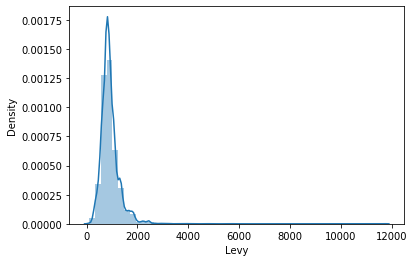

In [97]:
#distplot for levy collum
sns.distplot(df['Levy'])

In [98]:
#removing outlier for levy
df=df[df['Levy']<4000]

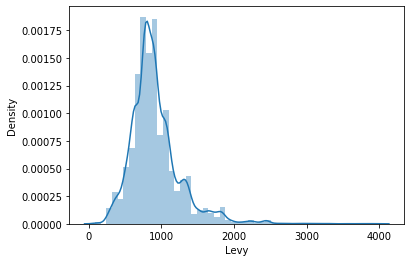

In [99]:
#distplot after outlier
sns.distplot(df['Levy'])

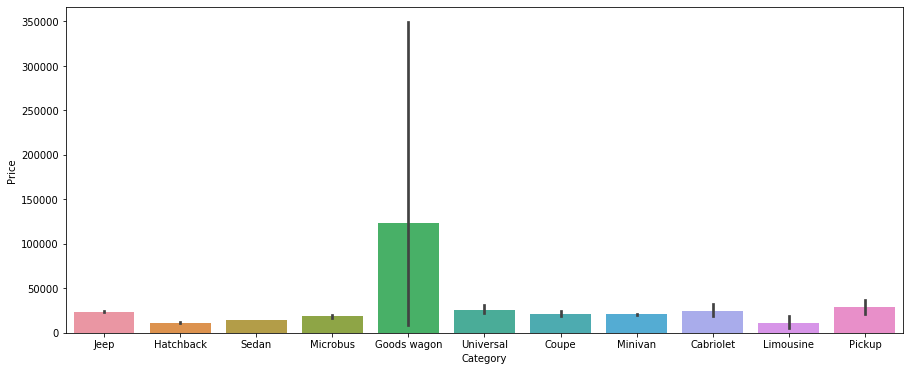

In [100]:
#barplots for categories
plt.figure(figsize=(15,6))
sns.barplot(x='Category',y='Price',data=df) #category

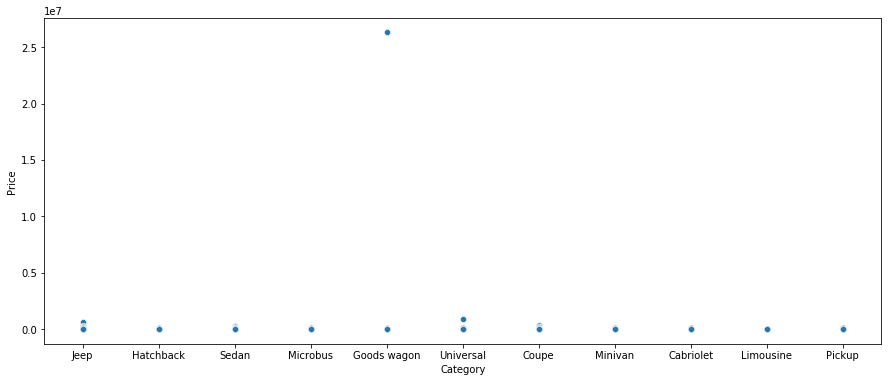

In [101]:
#scatter plot
plt.figure(figsize=(15,6))
sns.scatterplot(x='Category',y='Price',data=df)

In [102]:
#handling outlier for wagon
df[['Price','Category']].sort_values('Price',ascending=False).max()

Price        26307500
Category    Universal
dtype: object

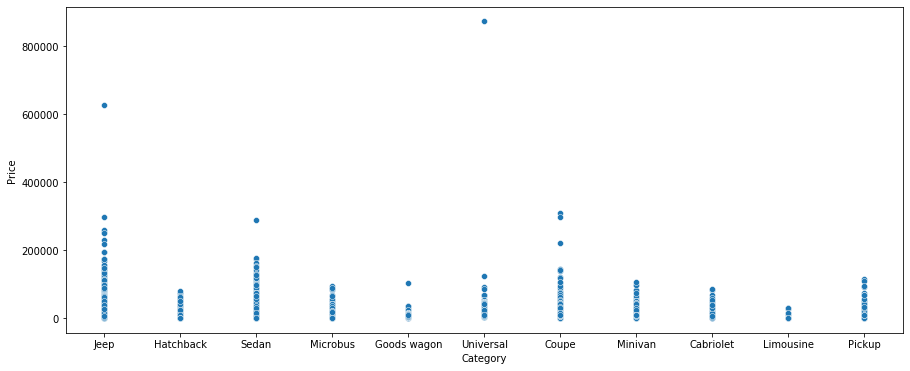

In [103]:
#removing outlier for wagon
df=df[df['Price']<26307500]
plt.figure(figsize=(15,6))
sns.scatterplot(x='Category',y='Price',data=df)

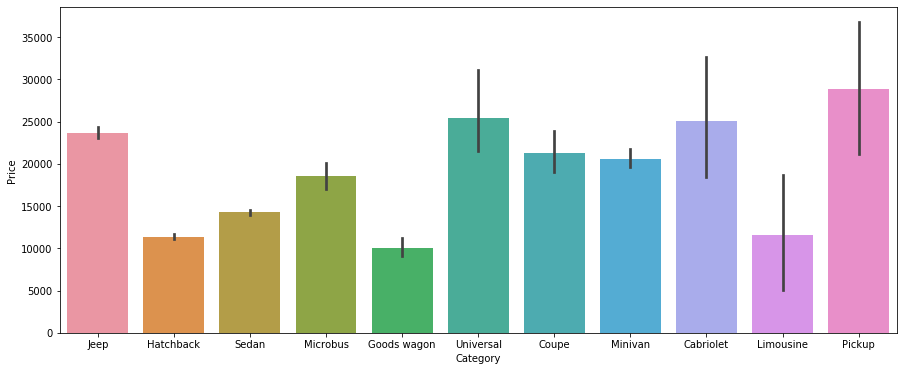

In [104]:
#barplot (wagon) ater outlier
plt.figure(figsize=(15,6))
sns.barplot(x='Category',y='Price',data=df)

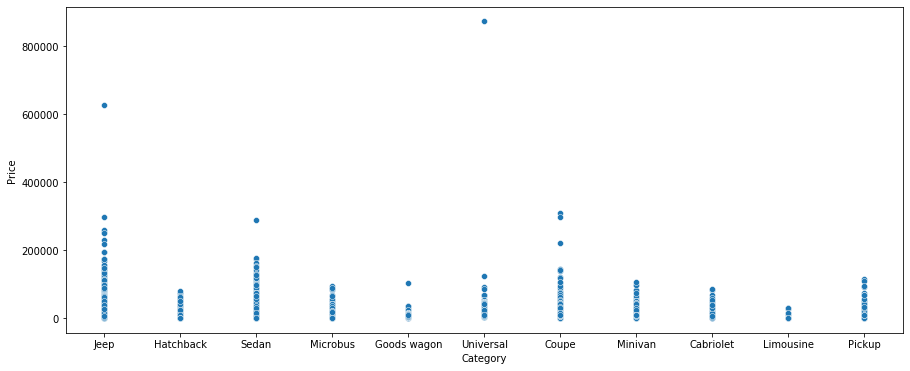

In [105]:
#after outlier removal for universal
plt.figure(figsize=(15,6))
sns.scatterplot(x='Category',y='Price',data=df)

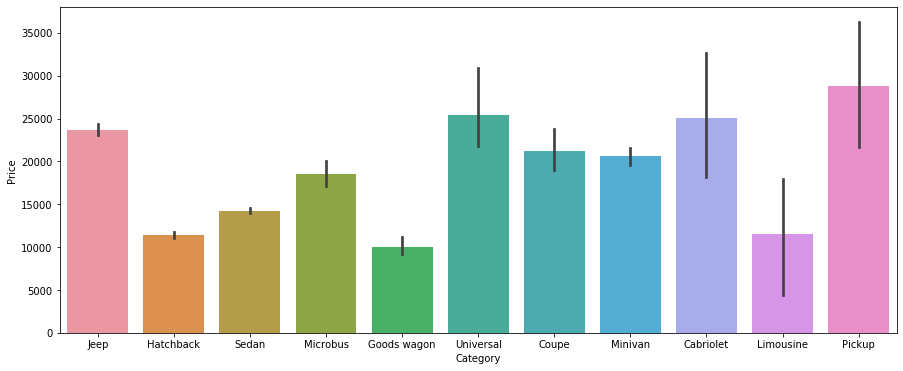

In [106]:
#barplot for universal after outlier removal
plt.figure(figsize=(15,6))
sns.barplot(x='Category',y='Price',data=df)

In [107]:
#handling outlier for jeep
df[['Price','Category']].sort_values('Price',ascending=False)

,Price,Category
8541,872946,Universal
1225,627220,Jeep
5008,308906,Coupe
14839,297930,Jeep
9367,297930,Coupe
...,...,...
221,3,Sedan
7276,3,Jeep
17596,3,Sedan
7815,1,Sedan


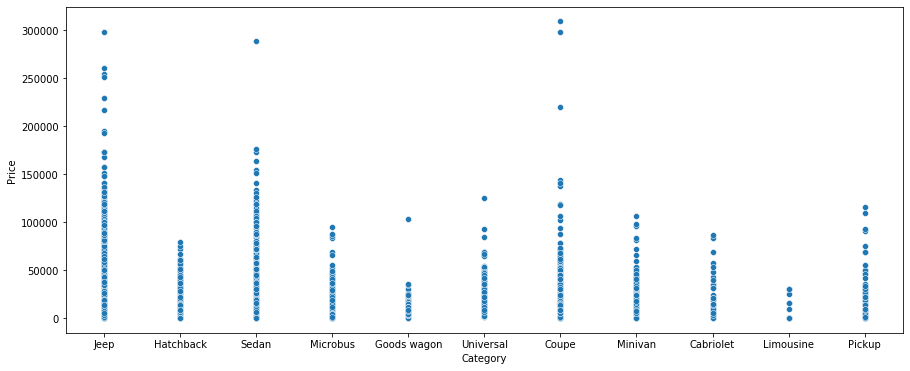

In [108]:
#removing outlier
df=df[df['Price']<627220]
plt.figure(figsize=(15,6))
sns.scatterplot(x='Category',y='Price',data=df)

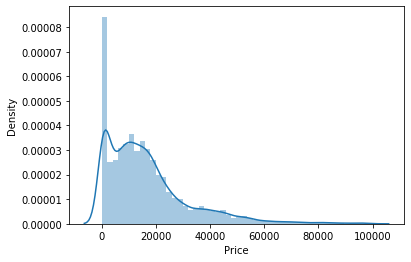

In [109]:
#distplot for price
df=df[df['Price']<100000]
sns.distplot(df['Price'])

In [110]:
df.shape

(19103, 20)

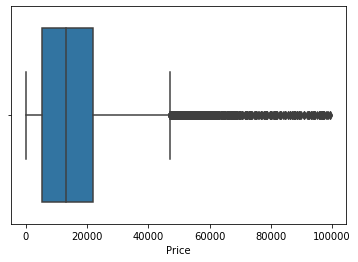

In [111]:
#boxplot
sns.boxplot(df['Price'])

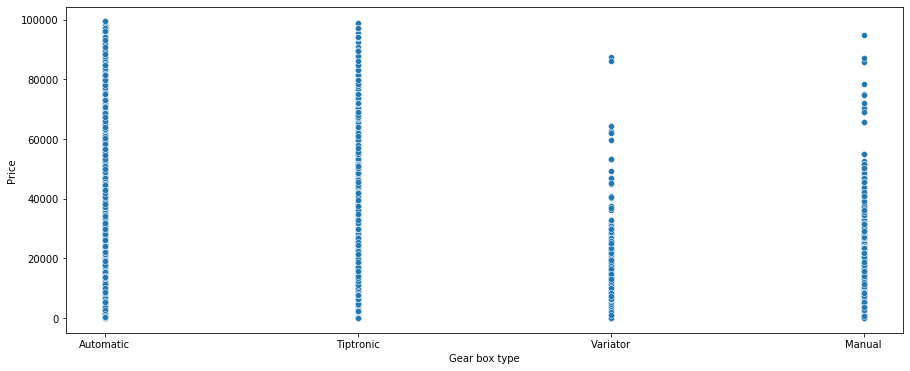

In [112]:
#gearbox type
plt.figure(figsize=(15,6))
sns.scatterplot(x='Gear box type',y='Price',data=df)

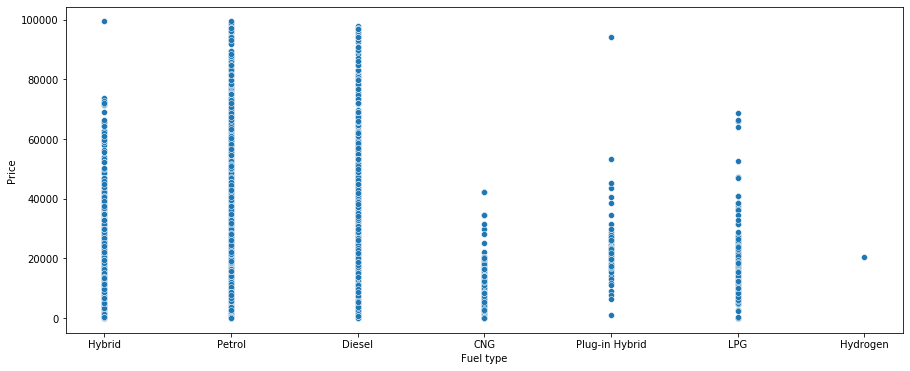

In [113]:
#fuel type
plt.figure(figsize=(15,6))
sns.scatterplot(x='Fuel type',y='Price',data=df)

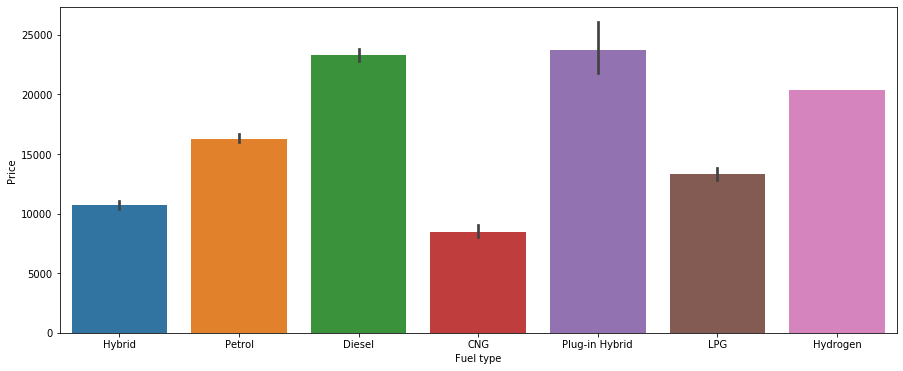

In [114]:
#barplot fuel type
plt.figure(figsize=(15,6))
sns.barplot(x='Fuel type',y='Price',data=df)

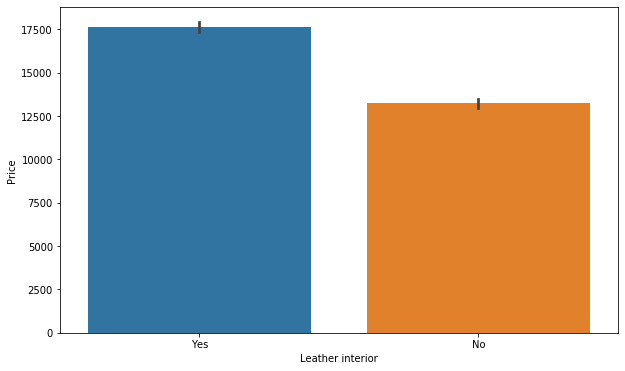

In [115]:
#leather interior
plt.figure(figsize=(10,6))
sns.barplot(x='Leather interior',y='Price',data=df)

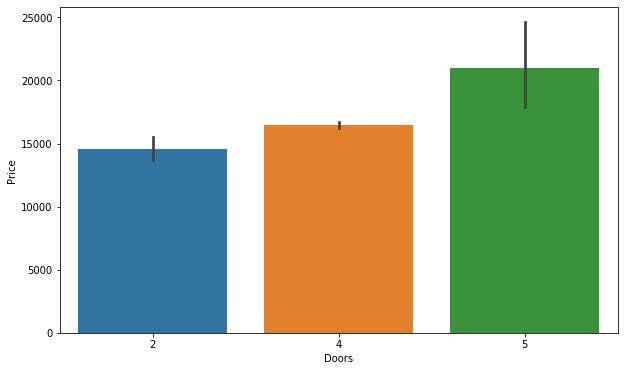

In [116]:
#after mapping
plt.figure(figsize=(10,6))
sns.barplot(x='Doors',y='Price',data=df)

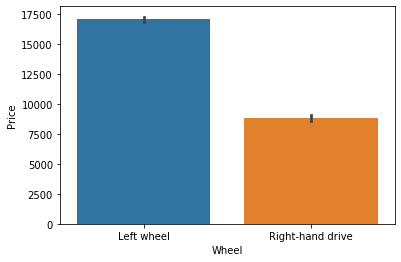

In [117]:
#wheels
sns.barplot(x='Wheel',y='Price',data=df)

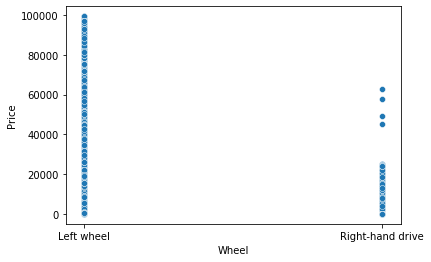

In [118]:
#scatter plot of wheels
sns.scatterplot(x='Wheel',y='Price',data=df)

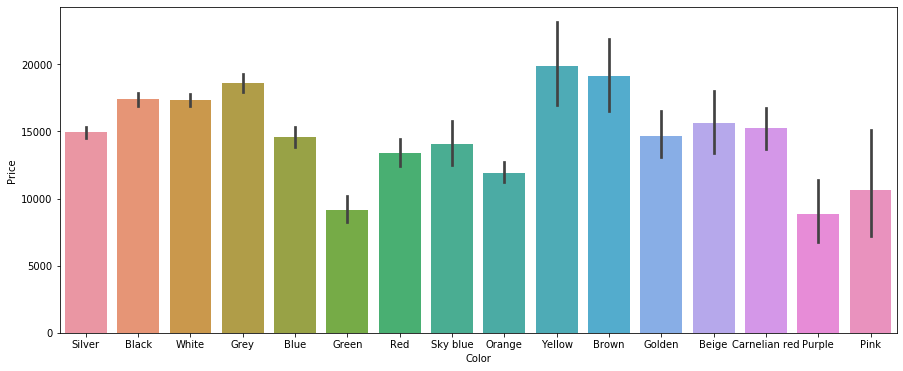

In [119]:
#color
plt.figure(figsize=(15,6))
sns.barplot(x='Color',y='Price',data=df)

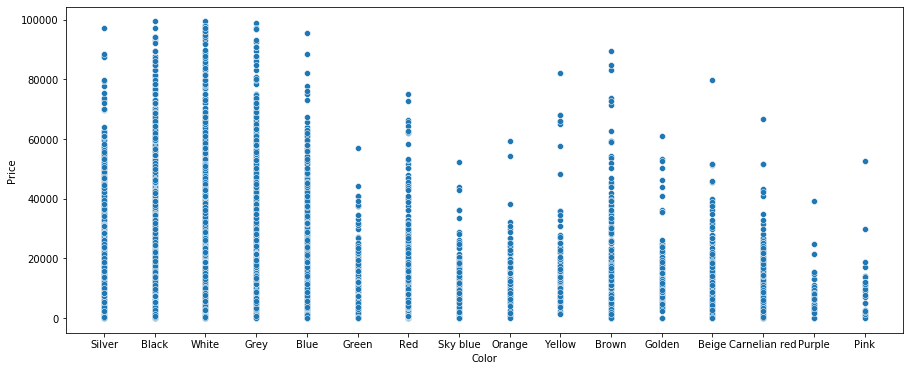

In [120]:
#scatter plot for color
plt.figure(figsize=(15,6))
sns.scatterplot(x='Color',y='Price',data=df)

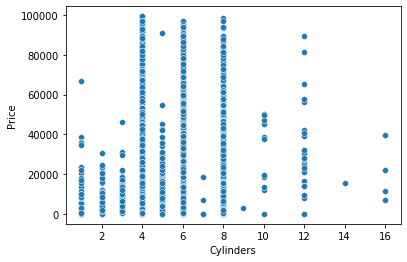

In [121]:
#cylienders
sns.scatterplot(x='Cylinders',y='Price',data=df)

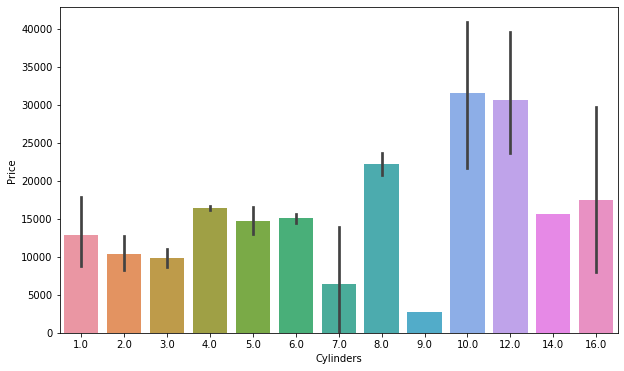

In [122]:
#barplot for cyliender
plt.figure(figsize=(10,6))
sns.barplot(x='Cylinders',y='Price',data=df)

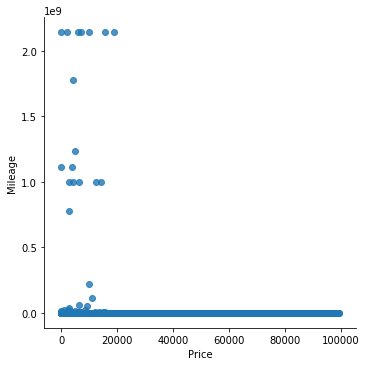

In [123]:
#Mileage
sns.lmplot(x='Price',y='Mileage',data=df)

In [124]:
#removing outlier for mileage
df=df[df['Mileage']<2147483647]

In [125]:
df.shape

(19096, 20)

In [126]:
df[df['Mileage']==0]

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Engine volume num,turbo
11,45814819,8781,790.660000,FORD,Transit,1999,Microbus,No,CNG,4,0,8.0,Manual,Rear,2,Left wheel,Blue,0,4.0,0
24,45813492,4704,1124.923077,OPEL,Vectra,1995,Sedan,No,Petrol,1.8,0,4.0,Automatic,Front,4,Left wheel,Green,4,1.8,0
26,45759112,549,2455.000000,LEXUS,GX 470,2008,Jeep,Yes,Petrol,4.7,0,8.0,Automatic,4x4,4,Left wheel,White,0,4.7,0
83,45765301,8154,1119.000000,HONDA,Cr-v,1998,Jeep,No,Petrol,2,0,4.0,Automatic,4x4,4,Right-hand drive,White,2,2.0,0
97,45749534,4234,751.419355,HONDA,Civic,1997,Hatchback,Yes,Petrol,1.4,0,4.0,Manual,Front,2,Left wheel,Blue,6,1.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19064,45791823,2900,921.378240,BMW,320,1994,Sedan,Yes,Petrol,2,0,6.0,Manual,Rear,4,Left wheel,Green,2,2.0,0
19088,45782030,2200,1247.500000,PEUGEOT,406,2001,Sedan,No,Petrol,2,0,4.0,Manual,Front,4,Left wheel,White,2,2.0,0
19103,45748748,30,843.000000,NISSAN,Tiida,2006,Hatchback,No,Petrol,1.5,0,4.0,Automatic,Front,4,Right-hand drive,Black,4,1.5,0
19218,45748699,30,843.000000,NISSAN,Note,2006,Hatchback,No,Petrol,1.3,0,4.0,Automatic,Front,4,Right-hand drive,Green,9,1.3,0


In [127]:
df.isnull().sum()

ID                   0
Price                0
Levy                 0
Manufacturer         0
Model                0
Prod. year           0
Category             0
Leather interior     0
Fuel type            0
Engine volume        0
Mileage              0
Cylinders            0
Gear box type        0
Drive wheels         0
Doors                0
Wheel                0
Color                0
Airbags              0
Engine volume num    0
turbo                0
dtype: int64

In [128]:
#stats for Mileage
df["Mileage"].describe()

count    1.909600e+04
mean     7.558620e+05
std      2.591215e+07
min      0.000000e+00
25%      7.092200e+04
50%      1.266900e+05
75%      1.890260e+05
max      1.777778e+09
Name: Mileage, dtype: float64

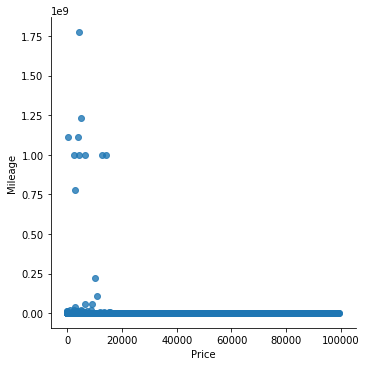

In [129]:
#looking for outliers in Mileage
sns.lmplot(x='Price',y='Mileage',data=df)

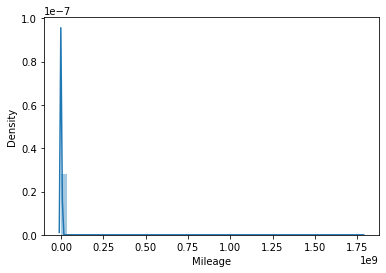

In [130]:
#distplot for mileage
sns.distplot(df['Mileage'])

In [131]:
#removal f outliers
df=df[df['Mileage']<400000]

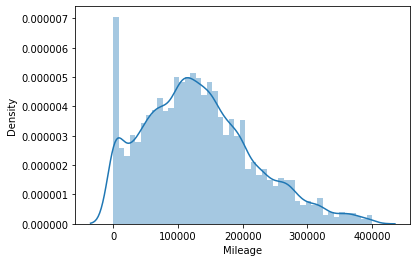

In [132]:
#distplot for mileage
sns.distplot(df['Mileage'])

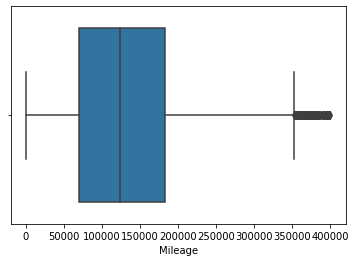

In [133]:
#boxplot for mileage
sns.boxplot(df['Mileage'])

In [134]:
#filling null values for Mileage
df['Mileage']=df['Mileage'].fillna(df['Mileage'].median())

In [135]:
#Manufacturer 
#setting values to other whose value count is less than 1000
man=set(i for i in df['Manufacturer'])
other=[]
for i in man:
    if df['Manufacturer'].value_counts()[i]<100:
        other.append(i)
df['Manufacturer']=df['Manufacturer'].apply(lambda x:'OTHER' if df['Manufacturer'].value_counts()[x]<100 else x)

In [136]:
df['Manufacturer'].value_counts()

TOYOTA           3558
HYUNDAI          3537
MERCEDES-BENZ    1989
FORD             1086
CHEVROLET        1067
BMW              1015
HONDA             971
LEXUS             970
OTHER             861
NISSAN            654
VOLKSWAGEN        572
SSANGYONG         441
KIA               418
OPEL              376
MITSUBISHI        282
SUBARU            270
AUDI              240
MAZDA             181
JEEP              136
Name: Manufacturer, dtype: int64

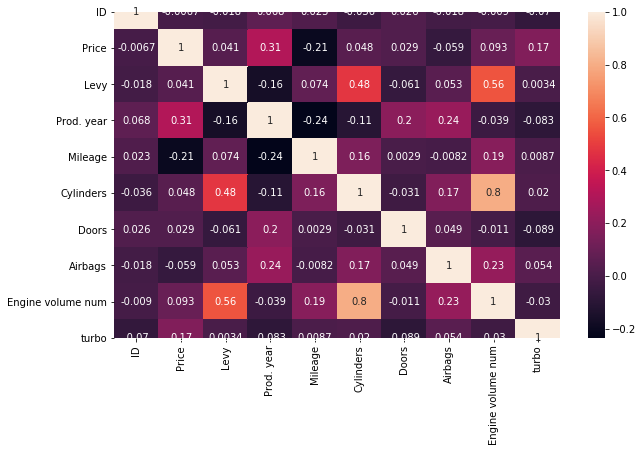

In [137]:
#checking coorelation
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

In [138]:
#production year
df['Prod. year'].value_counts()

2012    2126
2014    2032
2013    1944
2011    1589
2010    1460
2015    1428
2016    1412
2017     942
2008     716
2009     581
2018     476
2007     455
2005     390
2003     358
2004     350
2006     311
2019     293
2002     291
2000     274
2001     243
1998     202
1999     196
1997     135
1996     104
1995      93
2020      45
1994      40
1992      29
1993      21
1990      17
1988      11
1991       8
1989       6
1986       6
1984       5
1987       5
1953       4
1939       3
1983       3
1985       3
1977       2
1964       2
1980       2
1974       2
1965       2
1947       1
1981       1
1982       1
1957       1
1978       1
1973       1
1976       1
Name: Prod. year, dtype: int64

In [139]:
#making new feature out of prod. year
#old <2012 ,recent >2012
df['Model_variant']=df['Prod. year'].apply(lambda x:'recent' if (x>=2014 and x<=2020) else 'old')

In [162]:
df.Model.value_counts()

Prius           1022
Camry            929
Elantra          916
Sonata           859
E 350            530
                ... 
CLK 320 AMG        1
Sprinter 311       1
Cooper r50         1
508                1
Continental        1
Name: Model, Length: 1539, dtype: int64

In [163]:
#Manufacturer 
#setting values to other whose value count is less than 1000
man=set(i for i in df['Model'])
other=[]
for i in man:
    if df['Model'].value_counts()[i]<10:
        other.append(i)
df['Model']=df['Model'].apply(lambda x:'OTHER' if df['Model'].value_counts()[x]<10 else x)

In [164]:
df.Model.value_counts()

OTHER      2427
Prius      1022
Camry       929
Elantra     916
Sonata      859
           ... 
IS 200       10
Ipsum        10
Swift        10
Cerato       10
Touareg      10
Name: Model, Length: 211, dtype: int64

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18624 entries, 0 to 19236
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 18624 non-null  int64  
 1   Price              18624 non-null  int64  
 2   Levy               18624 non-null  float64
 3   Manufacturer       18624 non-null  object 
 4   Model              18624 non-null  object 
 5   Prod. year         18624 non-null  int64  
 6   Category           18624 non-null  object 
 7   Leather interior   18624 non-null  object 
 8   Fuel type          18624 non-null  object 
 9   Engine volume      18624 non-null  object 
 10  Mileage            18624 non-null  int64  
 11  Cylinders          18624 non-null  float64
 12  Gear box type      18624 non-null  object 
 13  Drive wheels       18624 non-null  object 
 14  Doors              18624 non-null  int32  
 15  Wheel              18624 non-null  object 
 16  Color              186

In [141]:
import category_encoders as ce

In [144]:
cols = [' Model','Manufacturer',"Category",'Leather interior',"Fuel type","Gear box type","Drive wheels",'Wheel','Color','Model_variant']

In [165]:
encoder = ce.TargetEncoder(cols = 'Model')
df['Model']=encoder.fit_transform(df['Model'],df["Levy"])

In [166]:
encoder = ce.TargetEncoder(cols = 'Manufacturer')
df['Manufacturer']=encoder.fit_transform(df['Manufacturer'],df["Levy"])

In [167]:
encoder = ce.TargetEncoder(cols = 'Category')
df['Category']=encoder.fit_transform(df['Category'],df["Levy"])

In [168]:
encoder = ce.TargetEncoder(cols = 'Leather interior')
df['Leather interior']=encoder.fit_transform(df['Leather interior'],df["Levy"])

In [169]:
encoder = ce.TargetEncoder(cols = 'Fuel type')
df['Fuel type']=encoder.fit_transform(df['Fuel type'],df["Levy"])

In [170]:
encoder = ce.TargetEncoder(cols = 'Gear box type')
df['Gear box type']=encoder.fit_transform(df['Gear box type'],df["Levy"])

In [171]:
encoder = ce.TargetEncoder(cols = 'Drive wheels')
df['Drive wheels']=encoder.fit_transform(df['Drive wheels'],df["Levy"])

In [172]:
encoder = ce.TargetEncoder(cols = 'Wheel')
df['Wheel']=encoder.fit_transform(df['Wheel'],df["Levy"])

In [173]:
encoder = ce.TargetEncoder(cols = 'Color')
df['Color']=encoder.fit_transform(df['Color'],df["Levy"])

In [174]:
encoder = ce.TargetEncoder(cols = 'Model_variant')
df['Model_variant']=encoder.fit_transform(df['Model_variant'],df["Levy"])

In [340]:
#df.groupby(['Model'])['Levy'].count()

Model
09-Mar      2
100         2
100 NX      1
1000       17
1111        1
           ..
iA isti     1
kona        1
macan       1
tC          3
xD          3
Name: Levy, Length: 1539, dtype: int64

In [341]:
#df.groupby(['Model'])['Levy'].mean()

Model
09-Mar     1626.604167
100        1103.500000
100 NX      765.000000
1000       1014.588235
1111        921.378240
              ...     
iA isti    1093.238806
kona        991.250000
macan      1079.000000
tC          942.305556
xD          798.407971
Name: Levy, Length: 1539, dtype: float64

In [342]:
#Mean_encoded_subject = df.groupby(['Model'])['Levy'].mean().to_dict()
  
#df['Model'] =  df['Model'].map(Mean_encoded_subject)
  
#print(df)

             ID  Price         Levy   Manufacturer        Model  Prod. year  \
0      45654403  13328  1399.000000          LEXUS  1127.367251        2010   
1      44731507  16621  1018.000000      CHEVROLET   872.940503        2011   
2      45774419   8467   807.478261          HONDA   844.241314        2006   
3      45769185   3607   862.000000           FORD   851.010060        2011   
4      45809263  11726   446.000000          HONDA   844.241314        2014   
...         ...    ...          ...            ...          ...         ...   
19232  45798355   8467   807.478261  MERCEDES-BENZ  1075.177194        1999   
19233  45778856  15681   831.000000        HYUNDAI   798.433042        2011   
19234  45804997  26108   836.000000        HYUNDAI   791.921590        2010   
19235  45793526   5331  1288.000000      CHEVROLET   956.516940        2007   
19236  45813273    470   753.000000        HYUNDAI   798.433042        2012   

        Category Leather interior Fuel type Engine 

In [175]:
df

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Engine volume num,turbo,Model_variant
0,13328,0.350714,0.325595,0.282619,2010,0.253864,0.228325,0.192156,0.465122,0.375,0.226503,0.284141,0.8,0.226294,0.228835,0.7500,0.522388,0,0.235508
1,16621,0.255202,0.184267,0.218837,2011,0.253864,0.230846,0.239354,0.480113,0.375,0.228221,0.284141,0.8,0.226294,0.239345,0.5000,0.447761,0,0.235508
2,8467,0.202426,0.216303,0.211642,2006,0.195431,0.230846,0.239354,0.500118,0.250,0.218058,0.204944,0.8,0.261289,0.239345,0.1250,0.194030,0,0.235508
3,3607,0.216094,0.212757,0.213339,2011,0.253864,0.228325,0.192156,0.422514,0.250,0.226503,0.284141,0.8,0.226294,0.223137,0.0000,0.373134,0,0.235508
4,11726,0.111807,0.216303,0.211642,2014,0.195431,0.228325,0.239354,0.229807,0.250,0.226503,0.204944,0.8,0.226294,0.228835,0.2500,0.194030,0,0.217289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,0.202426,0.278120,0.269499,1999,0.251987,0.228325,0.256051,0.750176,0.250,0.253455,0.267234,0.4,0.226294,0.228835,0.3125,0.298507,1,0.235508
19233,15681,0.208323,0.201690,0.200159,2011,0.218055,0.228325,0.239354,0.404095,0.250,0.228221,0.204944,0.8,0.226294,0.218959,0.5000,0.358209,0,0.235508
19234,26108,0.209576,0.201690,0.198526,2010,0.253864,0.228325,0.235918,0.290981,0.250,0.226503,0.204944,0.8,0.226294,0.222789,0.2500,0.298507,0,0.235508
19235,5331,0.322888,0.184267,0.239789,2007,0.253864,0.228325,0.235918,0.128175,0.250,0.226503,0.204944,0.8,0.226294,0.239345,0.2500,0.298507,0,0.235508


In [176]:
#dropping production collumn
#df=df.drop('Prod. year',axis=1)
df=df.drop('Engine volume',axis=1)
df=df.drop('ID',axis=1)

KeyError: "['Engine volume'] not found in axis"

In [177]:
df

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Engine volume num,turbo,Model_variant
0,13328,0.350714,0.325595,0.282619,2010,0.253864,0.228325,0.192156,0.465122,0.375,0.226503,0.284141,0.8,0.226294,0.228835,0.7500,0.522388,0,0.235508
1,16621,0.255202,0.184267,0.218837,2011,0.253864,0.230846,0.239354,0.480113,0.375,0.228221,0.284141,0.8,0.226294,0.239345,0.5000,0.447761,0,0.235508
2,8467,0.202426,0.216303,0.211642,2006,0.195431,0.230846,0.239354,0.500118,0.250,0.218058,0.204944,0.8,0.261289,0.239345,0.1250,0.194030,0,0.235508
3,3607,0.216094,0.212757,0.213339,2011,0.253864,0.228325,0.192156,0.422514,0.250,0.226503,0.284141,0.8,0.226294,0.223137,0.0000,0.373134,0,0.235508
4,11726,0.111807,0.216303,0.211642,2014,0.195431,0.228325,0.239354,0.229807,0.250,0.226503,0.204944,0.8,0.226294,0.228835,0.2500,0.194030,0,0.217289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,0.202426,0.278120,0.269499,1999,0.251987,0.228325,0.256051,0.750176,0.250,0.253455,0.267234,0.4,0.226294,0.228835,0.3125,0.298507,1,0.235508
19233,15681,0.208323,0.201690,0.200159,2011,0.218055,0.228325,0.239354,0.404095,0.250,0.228221,0.204944,0.8,0.226294,0.218959,0.5000,0.358209,0,0.235508
19234,26108,0.209576,0.201690,0.198526,2010,0.253864,0.228325,0.235918,0.290981,0.250,0.226503,0.204944,0.8,0.226294,0.222789,0.2500,0.298507,0,0.235508
19235,5331,0.322888,0.184267,0.239789,2007,0.253864,0.228325,0.235918,0.128175,0.250,0.226503,0.204944,0.8,0.226294,0.239345,0.2500,0.298507,0,0.235508


In [77]:
from sklearn.preprocessing import OrdinalEncoder

In [78]:
cols = [['Manufacturer',"Category",'Leather interior',"Fuel type","Gear box type","Drive wheels",'Wheel','Color','Model_variant']]
le=OrdinalEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

In [178]:
sts = MaxAbsScaler()
feature_scale = ['Levy','Cylinders','Doors','Airbags','Mileage','Engine volume num']
df[feature_scale]=sts.fit_transform(df[feature_scale])

In [179]:
df

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Engine volume num,turbo,Model_variant
0,13328,0.350714,0.325595,0.282619,2010,0.253864,0.228325,0.192156,0.465122,0.375,0.226503,0.284141,0.8,0.226294,0.228835,0.7500,0.522388,0,0.235508
1,16621,0.255202,0.184267,0.218837,2011,0.253864,0.230846,0.239354,0.480113,0.375,0.228221,0.284141,0.8,0.226294,0.239345,0.5000,0.447761,0,0.235508
2,8467,0.202426,0.216303,0.211642,2006,0.195431,0.230846,0.239354,0.500118,0.250,0.218058,0.204944,0.8,0.261289,0.239345,0.1250,0.194030,0,0.235508
3,3607,0.216094,0.212757,0.213339,2011,0.253864,0.228325,0.192156,0.422514,0.250,0.226503,0.284141,0.8,0.226294,0.223137,0.0000,0.373134,0,0.235508
4,11726,0.111807,0.216303,0.211642,2014,0.195431,0.228325,0.239354,0.229807,0.250,0.226503,0.204944,0.8,0.226294,0.228835,0.2500,0.194030,0,0.217289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,0.202426,0.278120,0.269499,1999,0.251987,0.228325,0.256051,0.750176,0.250,0.253455,0.267234,0.4,0.226294,0.228835,0.3125,0.298507,1,0.235508
19233,15681,0.208323,0.201690,0.200159,2011,0.218055,0.228325,0.239354,0.404095,0.250,0.228221,0.204944,0.8,0.226294,0.218959,0.5000,0.358209,0,0.235508
19234,26108,0.209576,0.201690,0.198526,2010,0.253864,0.228325,0.235918,0.290981,0.250,0.226503,0.204944,0.8,0.226294,0.222789,0.2500,0.298507,0,0.235508
19235,5331,0.322888,0.184267,0.239789,2007,0.253864,0.228325,0.235918,0.128175,0.250,0.226503,0.204944,0.8,0.226294,0.239345,0.2500,0.298507,0,0.235508


In [180]:
df.to_csv('trainh2o_new45895.csv',index=False)

In [213]:
import pandas as pd
df2=pd.read_csv('test.csv')

In [214]:
cols = ['Price']
df2 = df2.drop(columns=cols, axis=1)
df2.head()

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,44020629,-,VOLKSWAGEN,Golf,2012,Hatchback,No,Diesel,2.0 Turbo,0 km,4,Manual,Front,02-Mar,Left wheel,Grey,10
1,45784798,-,HYUNDAI,Sonata,2012,Sedan,Yes,Petrol,2.4,26000 km,4,Tiptronic,Front,04-May,Left wheel,Grey,10
2,45800257,-,NISSAN,Tiida,2005,Sedan,No,Petrol,1.5,168000 km,4,Automatic,Front,04-May,Right-hand drive,Sky blue,8
3,45797981,975,VOLVO,XC90,2012,Jeep,Yes,Petrol,3.2,143000 km,6,Automatic,4x4,04-May,Left wheel,Blue,12
4,45814303,-,OPEL,Astra,1993,Hatchback,No,Petrol,1.6,200000 km,4,Manual,Front,04-May,Left wheel,Black,0


In [215]:
df2['Levy'].replace('-',np.nan,inplace=True)

In [216]:
df2[['Levy']] = df2[["Levy"]].astype("float64")

In [217]:
df2['Levy'].replace(np.nan,df2['Levy'].mean(),inplace=True)

In [218]:
df2[['Levy']] = df2[["Levy"]].astype("int64")

In [219]:
df2['Doors'].replace('02-Mar','2',inplace=True)
df2['Doors'].replace('>5','5',inplace=True)
df2['Doors'].replace('04-May','4',inplace=True)

In [220]:
df2[['Doors']] = df2[["Doors"]].astype("int")

In [221]:
df2[['Mileage']] = df2[["Mileage"]].astype("str")
df2['Mileage'] = df2['Mileage'].str.replace(' km', '')

In [222]:
df2[['Mileage']] = df2[["Mileage"]].astype("int64")

In [223]:
df2["Manufacturer"].value_counts()

HYUNDAI          1589
TOYOTA           1515
MERCEDES-BENZ     907
FORD              481
CHEVROLET         451
                 ... 
MOSKVICH            1
ASTON MARTIN        1
MG                  1
BENTLEY             1
TATA                1
Name: Manufacturer, Length: 62, dtype: int64

In [224]:
#Manufacturer 
#setting values to other whose value count is less than 1000
man=set(i for i in df2['Manufacturer'])
other=[]
for i in man:
    if df2['Manufacturer'].value_counts()[i]<50:
        other.append(i)
df2['Manufacturer']=df2['Manufacturer'].apply(lambda x:'OTHER' if df2['Manufacturer'].value_counts()[x]<50 else x)

In [225]:
df2['Manufacturer'].value_counts()

HYUNDAI          1589
TOYOTA           1515
MERCEDES-BENZ     907
FORD              481
LEXUS             451
CHEVROLET         451
OTHER             433
HONDA             414
BMW               398
NISSAN            284
VOLKSWAGEN        271
SSANGYONG         202
OPEL              190
KIA               184
AUDI              120
MITSUBISHI        119
SUBARU            109
MAZDA              75
JEEP               52
Name: Manufacturer, dtype: int64

In [226]:
#making new feature out of prod. year
#old <2014 ,recent >2014
df2['Model_variant']=df2['Prod. year'].apply(lambda x:'recent' if (x>=2014 and x<=2020) else 'old')

In [227]:
# new data frame with split value columns
new = df2["Engine volume"].str.split(" ", n = 1, expand = True)
                                    
# making separate first name column from new data frame
df2["Engine volume num"]= new[0]
                                    
# making separate last name column from new data frame
df2["turbo"]= new[1] 
df2

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Model_variant,Engine volume num,turbo
0,44020629,917,VOLKSWAGEN,Golf,2012,Hatchback,No,Diesel,2.0 Turbo,0,4,Manual,Front,2,Left wheel,Grey,10,old,2.0,Turbo
1,45784798,917,HYUNDAI,Sonata,2012,Sedan,Yes,Petrol,2.4,26000,4,Tiptronic,Front,4,Left wheel,Grey,10,old,2.4,None
2,45800257,917,NISSAN,Tiida,2005,Sedan,No,Petrol,1.5,168000,4,Automatic,Front,4,Right-hand drive,Sky blue,8,old,1.5,None
3,45797981,975,OTHER,XC90,2012,Jeep,Yes,Petrol,3.2,143000,6,Automatic,4x4,4,Left wheel,Blue,12,old,3.2,None
4,45814303,917,OPEL,Astra,1993,Hatchback,No,Petrol,1.6,200000,4,Manual,Front,4,Left wheel,Black,0,old,1.6,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8240,44824410,1357,OTHER,Stilo,2004,Universal,No,Petrol,1.6,164000,4,Manual,Front,4,Left wheel,Blue,6,old,1.6,None
8241,45682346,917,BMW,528 F10,2012,Sedan,Yes,Petrol,2.8 Turbo,156000,4,Tiptronic,Front,4,Left wheel,Black,6,old,2.8,Turbo
8242,45649860,1646,LEXUS,GX 460,2015,Jeep,Yes,Petrol,4.6,102907,8,Automatic,4x4,4,Left wheel,Black,0,recent,4.6,None
8243,45809706,784,TOYOTA,Aqua,2017,Hatchback,Yes,Petrol,1.5,3000,4,Automatic,Front,4,Left wheel,Green,4,recent,1.5,None


In [228]:
df2[['Engine volume num']] = df2[["Engine volume num"]].astype("float64")

In [229]:
df2['turbo'].replace('None',0,inplace=True)
df2['turbo'].replace('Turbo',1,inplace=True)

In [230]:
df2['turbo'].unique()

array([ 1., nan])

In [231]:
df2['turbo'].replace(np.nan,0,inplace=True)
df2[['turbo']] = df2[["turbo"]].astype("uint8")

In [191]:
man=set(i for i in df2['Model'])
other=[]
for i in man:
    if df2['Model'].value_counts()[i]<10:
        other.append(i)
df2['Model']=df2['Model'].apply(lambda x:'OTHER' if df2['Model'].value_counts()[x]<10 else x)

In [193]:
df2.Model.value_counts()

OTHER             1596
Sonata             478
Prius              448
Camry              390
Elantra            378
                  ... 
CLA 250             10
Tiguan              10
X-Terra             10
Corsa               10
Grand Cherokee      10
Name: Model, Length: 127, dtype: int64

In [185]:
df2.groupby(['Model'])['Levy'].count()


Model
09-Mar           2
100              1
1000             2
114              2
116 i            1
                ..
kamaz/ კამაზი    1
kona SEL         1
macan            2
transit          1
xD               2
Name: Levy, Length: 995, dtype: int64

In [186]:
df2.groupby(['Model'])['Levy'].mean()

Model
09-Mar            917.0
100               917.0
1000             1077.0
114               906.5
116 i            1047.0
                  ...  
kamaz/ კამაზი     917.0
kona SEL         1079.0
macan            1048.0
transit          2390.0
xD                839.0
Name: Levy, Length: 995, dtype: float64

In [187]:
Mean_encoded_subject = df2.groupby(['Model'])['Levy'].mean().to_dict()
  
df2['Model'] =  df2['Model'].map(Mean_encoded_subject)
  
print(df2)

            ID  Levy Manufacturer        Model  Prod. year   Category  \
0     44020629   917   VOLKSWAGEN  1158.741935        2012  Hatchback   
1     45784798   917      HYUNDAI   799.502092        2012      Sedan   
2     45800257   917       NISSAN   917.000000        2005      Sedan   
3     45797981   975        OTHER  1338.333333        2012       Jeep   
4     45814303   917         OPEL   957.602941        1993  Hatchback   
...        ...   ...          ...          ...         ...        ...   
8240  44824410  1357        OTHER  1357.000000        2004  Universal   
8241  45682346   917          BMW   917.000000        2012      Sedan   
8242  45649860  1646        LEXUS  1593.912000        2015       Jeep   
8243  45809706   784       TOYOTA   826.839286        2017  Hatchback   
8244  45813163   448        HONDA   524.240741        2012  Hatchback   

     Leather interior Fuel type Engine volume  Mileage  Cylinders  \
0                  No    Diesel     2.0 Turbo        0

In [188]:
df2

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Model_variant,Engine volume num,turbo
0,44020629,917,VOLKSWAGEN,1158.741935,2012,Hatchback,No,Diesel,2.0 Turbo,0,4,Manual,Front,2,Left wheel,Grey,10,old,2.0,1
1,45784798,917,HYUNDAI,799.502092,2012,Sedan,Yes,Petrol,2.4,26000,4,Tiptronic,Front,4,Left wheel,Grey,10,old,2.4,0
2,45800257,917,NISSAN,917.000000,2005,Sedan,No,Petrol,1.5,168000,4,Automatic,Front,4,Right-hand drive,Sky blue,8,old,1.5,0
3,45797981,975,OTHER,1338.333333,2012,Jeep,Yes,Petrol,3.2,143000,6,Automatic,4x4,4,Left wheel,Blue,12,old,3.2,0
4,45814303,917,OPEL,957.602941,1993,Hatchback,No,Petrol,1.6,200000,4,Manual,Front,4,Left wheel,Black,0,old,1.6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8240,44824410,1357,OTHER,1357.000000,2004,Universal,No,Petrol,1.6,164000,4,Manual,Front,4,Left wheel,Blue,6,old,1.6,0
8241,45682346,917,BMW,917.000000,2012,Sedan,Yes,Petrol,2.8 Turbo,156000,4,Tiptronic,Front,4,Left wheel,Black,6,old,2.8,1
8242,45649860,1646,LEXUS,1593.912000,2015,Jeep,Yes,Petrol,4.6,102907,8,Automatic,4x4,4,Left wheel,Black,0,recent,4.6,0
8243,45809706,784,TOYOTA,826.839286,2017,Hatchback,Yes,Petrol,1.5,3000,4,Automatic,Front,4,Left wheel,Green,4,recent,1.5,0


In [232]:
#dropping production collumn
#df2=df2.drop('Prod. year',axis=1)
df2=df2.drop('Engine volume',axis=1)
df2=df2.drop('ID',axis=1)

In [190]:
from sklearn.preprocessing import OrdinalEncoder

In [191]:
cols = [['Manufacturer',"Category",'Leather interior',"Fuel type","Gear box type","Drive wheels",'Wheel','Color','Model_variant']]
le=OrdinalEncoder()
for col in cols:
    df2[col] = le.fit_transform(df2[col])

In [233]:
encoder = ce.TargetEncoder(cols = 'Model')
df2['Model']=encoder.fit_transform(df2['Model'],df2["Levy"])

In [234]:
encoder = ce.TargetEncoder(cols = 'Manufacturer')
df2['Manufacturer']=encoder.fit_transform(df2['Manufacturer'],df2["Levy"])

In [235]:
encoder = ce.TargetEncoder(cols = 'Category')
df2['Category']=encoder.fit_transform(df2['Category'],df2["Levy"])

In [236]:
encoder = ce.TargetEncoder(cols = 'Leather interior')
df2['Leather interior']=encoder.fit_transform(df2['Leather interior'],df2["Levy"])

In [237]:
encoder = ce.TargetEncoder(cols = 'Fuel type')
df2['Fuel type']=encoder.fit_transform(df2['Fuel type'],df2["Levy"])

In [238]:
encoder = ce.TargetEncoder(cols = 'Gear box type')
df2['Gear box type']=encoder.fit_transform(df2['Gear box type'],df2["Levy"])

In [239]:
encoder = ce.TargetEncoder(cols = 'Drive wheels')
df2['Drive wheels']=encoder.fit_transform(df2['Drive wheels'],df2["Levy"])

In [240]:
encoder = ce.TargetEncoder(cols = 'Wheel')
df2['Wheel']=encoder.fit_transform(df2['Wheel'],df2["Levy"])

In [241]:
encoder = ce.TargetEncoder(cols = 'Color')
df2['Color']=encoder.fit_transform(df2['Color'],df2["Levy"])

In [242]:
encoder = ce.TargetEncoder(cols = 'Model_variant')
df2['Model_variant']=encoder.fit_transform(df2['Model_variant'],df2["Levy"])

In [243]:
sts = MaxAbsScaler()
feature_scale = ['Levy','Cylinders','Doors','Airbags','Mileage','Engine volume num']
df2[feature_scale]=sts.fit_transform(df2[feature_scale])

In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18624 entries, 0 to 19236
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Price              18624 non-null  int64  
 1   Levy               18624 non-null  float64
 2   Manufacturer       18624 non-null  float64
 3   Model              18624 non-null  float64
 4   Prod. year         18624 non-null  int64  
 5   Category           18624 non-null  float64
 6   Leather interior   18624 non-null  float64
 7   Fuel type          18624 non-null  float64
 8   Mileage            18624 non-null  float64
 9   Cylinders          18624 non-null  float64
 10  Gear box type      18624 non-null  float64
 11  Drive wheels       18624 non-null  float64
 12  Doors              18624 non-null  float64
 13  Wheel              18624 non-null  float64
 14  Color              18624 non-null  float64
 15  Airbags            18624 non-null  float64
 16  Engine volume num  186

In [245]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8245 entries, 0 to 8244
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Levy               8245 non-null   float64
 1   Manufacturer       8245 non-null   float64
 2   Model              8245 non-null   float64
 3   Prod. year         8245 non-null   int64  
 4   Category           8245 non-null   float64
 5   Leather interior   8245 non-null   float64
 6   Fuel type          8245 non-null   float64
 7   Mileage            8245 non-null   float64
 8   Cylinders          8245 non-null   float64
 9   Gear box type      8245 non-null   float64
 10  Drive wheels       8245 non-null   float64
 11  Doors              8245 non-null   float64
 12  Wheel              8245 non-null   float64
 13  Color              8245 non-null   float64
 14  Airbags            8245 non-null   float64
 15  Model_variant      8245 non-null   float64
 16  Engine volume num  8245 

In [246]:
df2.to_csv('testh2onew45.csv',index=False)

In [196]:
df2

,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Model_variant,Engine volume num,turbo
0,0.121812,18.0,1158.741935,2012,3.0,0.0,1.0,0.000000,0.031496,1.0,1.0,0.4,0.0,7.0,0.625,0.0,0.185185,1
1,0.121812,5.0,799.502092,2012,9.0,1.0,5.0,0.000012,0.031496,2.0,1.0,0.8,0.0,7.0,0.625,0.0,0.222222,0
2,0.121812,12.0,917.000000,2005,9.0,0.0,5.0,0.000078,0.031496,0.0,1.0,0.8,1.0,13.0,0.500,0.0,0.138889,0
3,0.129516,14.0,1338.333333,2012,4.0,1.0,5.0,0.000067,0.047244,0.0,0.0,0.8,0.0,2.0,0.750,0.0,0.296296,0
4,0.121812,13.0,957.602941,1993,3.0,0.0,5.0,0.000093,0.031496,1.0,1.0,0.8,0.0,1.0,0.000,0.0,0.148148,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8240,0.180260,14.0,1357.000000,2004,10.0,0.0,5.0,0.000076,0.031496,1.0,1.0,0.8,0.0,2.0,0.375,0.0,0.148148,0
8241,0.121812,1.0,917.000000,2012,9.0,1.0,5.0,0.000073,0.031496,2.0,1.0,0.8,0.0,1.0,0.375,0.0,0.259259,1
8242,0.218650,8.0,1593.912000,2015,4.0,1.0,5.0,0.000048,0.062992,0.0,0.0,0.8,0.0,1.0,0.000,1.0,0.425926,0
8243,0.104145,17.0,826.839286,2017,3.0,1.0,5.0,0.000001,0.031496,0.0,1.0,0.8,0.0,6.0,0.250,1.0,0.138889,0
